<a href="https://colab.research.google.com/github/kautilyak/KDD-project/blob/main/Relational_Analysis_of_Country_Wise_Economic_Growth_and_Academic_Qualification_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA** and preprocessing

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer

Importing the raw datasets

In [3]:
cols_to_keep = ['Country Name', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

#education attainment
lower_secondary_og = pd.read_csv('data/attain_lower_secondary.csv', skiprows=3, header=1, usecols=cols_to_keep)
upper_secondary_og = pd.read_csv('data/attain_upper_secondary.csv', skiprows=2, header=1, usecols=cols_to_keep)
bachelors_og = pd.read_csv('data/attain_bachelors.csv', skiprows=3, header=1, usecols=cols_to_keep)
masters_og = pd.read_csv('data/attain_masters.csv', skiprows=3, header=1, usecols=cols_to_keep)
doctoral_og = pd.read_csv('data/attain_doctoral.csv', skiprows=3, header=1, usecols=cols_to_keep)

#Literacy Rate
#literacy_og = pd.read_csv('data/literacy_rate.csv', skiprows=3, header=1, usecols = cols_to_keep)

#Population 
population_og = pd.read_csv('data/population_total.csv', skiprows=2, header=1, usecols = cols_to_keep)

#Country Data GDP
gdp_millions_og = pd.read_csv('data/country_gdp_millions.csv', skiprows=3, header=1, usecols=cols_to_keep)
expenditure_total_og = pd.read_csv('data/expenditure_total_gdp.csv', skiprows=3, header=1, usecols=cols_to_keep)

Restructuring the dataset to the required format


In [4]:
#restructure the data to match the required format.

lower_secondary = lower_secondary_og.melt(id_vars=['Country Name'], var_name="Year", value_name="LowerSecondaryAttainment")
upper_secondary = upper_secondary_og.melt(id_vars=['Country Name'], var_name="Year", value_name="UpperSecondaryAttainment")
bachelors = bachelors_og.melt(id_vars=['Country Name'], var_name="Year", value_name="BachelorsAttainment")
masters = masters_og.melt(id_vars=['Country Name'], var_name="Year", value_name="MastersAttainment")
doctoral = doctoral_og.melt(id_vars=['Country Name'], var_name="Year", value_name="DoctoralAttainment")

#literacy = literacy_og.melt(id_vars=['Country Name'], var_name = 'Year', value_name = 'Literacy Rate')

population = population_og.melt(id_vars=['Country Name'], var_name = 'Year', value_name = 'Population')
expenditure_total = expenditure_total_og.melt(id_vars=['Country Name'], var_name="Year", value_name="%_expenditure_gdp")
gdp_millions = gdp_millions_og.melt(id_vars=['Country Name'], var_name="Year", value_name="GDP")

In [5]:
lower_secondary.head()

,Country Name,Year,LowerSecondaryAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [6]:
upper_secondary.head()

,Country Name,Year,UpperSecondaryAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [7]:
bachelors.head()

,Country Name,Year,BachelorsAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [8]:
masters.head()

,Country Name,Year,MastersAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [9]:
doctoral.head()

,Country Name,Year,DoctoralAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [10]:
#GDP in millions of USD
gdp_millions.head()

,Country Name,Year,GDP
0,Aruba,2001,1.920112e+09
1,Africa Eastern and Southern,2001,2.414727e+11
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,1.418625e+11
4,Angola,2001,8.936064e+09


**Merging data into one DataFrame based on Country and year.**

In [11]:


df= lower_secondary.merge(upper_secondary, on=['Country Name', 'Year'], how='inner')
df = df.merge(bachelors, on= ['Country Name', 'Year'], how='inner')
df = df.merge(masters, on= ['Country Name', 'Year'], how='inner')
df = df.merge(doctoral, on= ['Country Name', 'Year'], how='inner')

#df = df.merge(literacy,on= ['Country Name', 'Year'], how='inner')

df = df.merge(population, on= ['Country Name', 'Year'], how='inner')

df= df.merge(gdp_millions, on= ['Country Name', 'Year'], how='inner')
df= df.merge(expenditure_total, on= ['Country Name', 'Year'], how='inner')

In [12]:
df.sort_values(by='DoctoralAttainment', ascending=False).head(10)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
3495,Switzerland,2014,97.020653,84.643852,35.605011,18.198759,2.97441,8188649.0,7.343966e+11,5.05123
4559,Switzerland,2018,97.085258,85.681770,NaN,19.968210,2.93416,8514329.0,7.358892e+11,NaN
4027,Switzerland,2016,96.890182,84.536911,NaN,18.941710,2.90631,8373338.0,6.956007e+11,5.10473
3761,Switzerland,2015,97.093933,85.190010,36.949291,19.010530,2.90017,8282396.0,7.021496e+11,5.10057
4478,Slovenia,2017,97.772781,82.560631,20.681210,15.322310,2.75572,2066388.0,4.846659e+10,4.78324
3998,United Arab Emirates,2016,70.710388,53.070511,31.690479,15.693130,2.53629,9360975.0,3.570451e+11,NaN
4212,Slovenia,2016,97.620468,81.868843,19.643311,14.654430,2.30224,2065042.0,4.473633e+10,4.80178
4773,United States,2018,96.029373,89.805359,34.992470,13.050380,2.03265,326838199.0,2.061186e+13,NaN
4241,United States,2016,95.585243,89.092361,33.439690,12.614010,1.85372,323071755.0,1.874508e+13,NaN
3709,United States,2014,95.263474,88.313583,31.955799,11.765360,1.76948,318386329.0,1.752716e+13,4.96174


**Finding out the statistics for the data at hand.**


In [13]:
df.describe()

,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
count,859.000000,892.000000,395.000000,313.000000,266.000000,5.027000e+03,4.815000e+03,2677.000000
mean,67.347947,54.028222,16.953988,6.017786,0.549386,2.801156e+08,2.021519e+12,4.369480
std,24.973076,24.312810,9.409896,5.871226,0.553637,8.821797e+08,7.300274e+12,1.605875
min,2.036170,0.495100,0.000000,0.000000,0.000000,9.478000e+03,1.319654e+07,0.622470
25%,49.352505,33.742116,9.868765,1.406010,0.165848,1.362444e+06,6.030060e+09,3.284650
50%,69.974228,56.564384,16.016060,2.944240,0.426045,9.483499e+06,3.847452e+10,4.171280
75%,90.304523,75.622433,23.706759,10.866280,0.754873,5.910752e+07,4.425368e+11,5.193330
max,100.000000,97.399788,59.260880,28.150810,2.974410,7.673345e+09,8.760777e+13,14.059080


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              5054 non-null   object 
 1   Year                      5054 non-null   object 
 2   LowerSecondaryAttainment  859 non-null    float64
 3   UpperSecondaryAttainment  892 non-null    float64
 4   BachelorsAttainment       395 non-null    float64
 5   MastersAttainment         313 non-null    float64
 6   DoctoralAttainment        266 non-null    float64
 7   Population                5027 non-null   float64
 8   GDP                       4815 non-null   float64
 9   %_expenditure_gdp         2677 non-null   float64
dtypes: float64(8), object(2)
memory usage: 434.3+ KB


In [15]:
df['Year'] = df['Year'].astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              5054 non-null   object 
 1   Year                      5054 non-null   int64  
 2   LowerSecondaryAttainment  859 non-null    float64
 3   UpperSecondaryAttainment  892 non-null    float64
 4   BachelorsAttainment       395 non-null    float64
 5   MastersAttainment         313 non-null    float64
 6   DoctoralAttainment        266 non-null    float64
 7   Population                5027 non-null   float64
 8   GDP                       4815 non-null   float64
 9   %_expenditure_gdp         2677 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 434.3+ KB


In [17]:
df.sort_values(by='GDP', ascending=False).head(20)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
5047,World,2019,NaN,NaN,NaN,NaN,NaN,7.673345e+09,8.760777e+13,NaN
4781,World,2018,NaN,NaN,NaN,NaN,NaN,7.592476e+09,8.634351e+13,NaN
4515,World,2017,NaN,NaN,NaN,NaN,NaN,7.509410e+09,8.132672e+13,4.529165
3717,World,2014,NaN,NaN,NaN,NaN,NaN,7.254293e+09,7.946886e+13,4.629460
3451,World,2013,NaN,NaN,NaN,NaN,NaN,7.169675e+09,7.733191e+13,4.529430
4249,World,2016,NaN,NaN,NaN,NaN,NaN,7.424485e+09,7.641725e+13,4.459100
3983,World,2015,NaN,NaN,NaN,NaN,NaN,7.339077e+09,7.523360e+13,4.624320
3185,World,2012,NaN,NaN,NaN,NaN,NaN,7.085790e+09,7.517281e+13,4.207535
2919,World,2011,NaN,NaN,NaN,NaN,NaN,7.002881e+09,7.347986e+13,4.272140
2653,World,2010,NaN,NaN,NaN,NaN,NaN,6.921877e+09,6.616266e+13,4.539660


In [18]:
df.columns

Index(['Country Name', 'Year', 'LowerSecondaryAttainment',
       'UpperSecondaryAttainment', 'BachelorsAttainment', 'MastersAttainment',
       'DoctoralAttainment', 'Population', 'GDP', '%_expenditure_gdp'],
      dtype='object')

###**Perfom listwise deletion for all rows**
#### If all the columns in the subset have null values in them, they are dropped.

In [19]:

df1 = df.dropna(axis=0, how='all', subset=['LowerSecondaryAttainment',
       'UpperSecondaryAttainment', 'BachelorsAttainment', 'MastersAttainment',
       'DoctoralAttainment'])

df1.sort_values(by="GDP", ascending=False).head(50)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
4773,United States,2018,96.029373,89.805359,34.992470,13.05038,2.03265,3.268382e+08,2.061186e+13,NaN
4241,United States,2016,95.585243,89.092361,33.439690,12.61401,1.85372,3.230718e+08,1.874508e+13,NaN
3975,United States,2015,95.334969,88.411972,32.500759,11.99485,1.70131,3.207390e+08,1.823830e+13,NaN
3709,United States,2014,95.263474,88.313583,31.955799,11.76536,1.76948,3.183863e+08,1.752716e+13,4.96174
3443,United States,2013,95.204529,88.150307,31.660660,11.56644,1.67716,3.160599e+08,1.678485e+13,4.93105
3177,United States,2012,94.984489,87.679100,NaN,NaN,NaN,3.138777e+08,1.619701e+13,NaN
2911,United States,2011,94.902733,87.590889,NaN,NaN,NaN,3.115835e+08,1.554258e+13,NaN
2645,United States,2010,94.769501,87.149406,NaN,NaN,NaN,3.093271e+08,1.499205e+13,NaN
2113,United States,2008,94.485550,86.614128,NaN,NaN,NaN,3.040940e+08,1.471284e+13,NaN
2379,United States,2009,94.535217,86.709084,NaN,NaN,NaN,3.067715e+08,1.444893e+13,NaN


In [20]:
df1.shape

(933, 10)

In [21]:
df1[df1['Country Name']=="Canada"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
35,Canada,2001,NaN,67.745132,NaN,NaN,NaN,31020902.0,7.389818e+11,4.96956
1365,Canada,2006,NaN,79.403389,NaN,NaN,NaN,32571174.0,1.319265e+12,NaN
2695,Canada,2011,NaN,82.748993,NaN,NaN,NaN,34339328.0,1.793327e+12,5.27444
4025,Canada,2016,NaN,84.469193,25.75444,7.09874,0.9462,36109487.0,1.527995e+12,NaN


In [22]:
#number of null values in the DoctoralAttainment column
df1[df1['DoctoralAttainment'].isnull()].sum
#% of rows containing null values
df1[df1['DoctoralAttainment'].isnull()].shape[0]*100/df1.shape[0]

71.48981779206859

In [23]:
#number of null values in the MastersAttainment column
df1[df1['MastersAttainment'].isnull()].sum
#% of rows containing null values
df1[df1['MastersAttainment'].isnull()].shape[0]*100/df1.shape[0]

66.45230439442658

In [24]:
#number of null values in the BachelorsAttainment column
df1[df1['BachelorsAttainment'].isnull()].sum
#% of  rows containing null values
df1[df1['BachelorsAttainment'].isnull()].shape[0]*100/df1.shape[0]

57.663451232583064

In [25]:
#number of null values in the UpperSecondaryAttainment column
df1[df1['UpperSecondaryAttainment'].isnull()].shape
#% of rows containing null values
df1[df1['UpperSecondaryAttainment'].isnull()].shape[0]*100/df1.shape[0]

4.394426580921758

In [26]:
#number of null values in the LowerSecondaryAttainment column
df1[df1['LowerSecondaryAttainment'].isnull()].shape
#% of rows containing null values
df1[df1['LowerSecondaryAttainment'].isnull()].shape[0]*100/df1.shape[0]

7.931404072883173

In [27]:
#counting the number of countries in the dataFrame. We can see that the total number of countries is 160
print(df1['Country Name'].nunique())
np.sort(df1['Country Name'].unique())

160


array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'I

we can see that we have 160 countries of which we will only consider about 48 due to absense of data.

Steps to fill in the null values:
1. find data from other data sources
2. predict values for a few missing years for that particular country

In [28]:
df1[df1['Country Name']=="India"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
2769,India,2011,37.56583,26.88855,9.13629,NaN,NaN,1.250288e+09,1.823050e+12,3.79618


In [29]:
df1[df1['Country Name']=="Pakistan"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
1248,Pakistan,2005,21.421249,6.758670,3.91674,NaN,NaN,160304007.0,1.200553e+11,2.04972
1514,Pakistan,2006,32.457909,23.346050,6.29512,NaN,NaN,164022626.0,1.372641e+11,2.39551
2046,Pakistan,2008,31.218460,22.583241,5.97695,NaN,NaN,171648984.0,1.700778e+11,2.74623
2312,Pakistan,2009,32.203251,23.299620,6.67146,NaN,NaN,175525610.0,1.681528e+11,2.59078
2578,Pakistan,2010,33.385101,23.878719,6.97446,NaN,NaN,179424643.0,1.771656e+11,2.28687
2844,Pakistan,2011,33.247822,24.154091,7.36819,NaN,NaN,183340168.0,2.135874e+11,2.22175
3110,Pakistan,2012,34.975361,25.649509,NaN,1.63380,0.46233,187280125.0,2.243836e+11,2.13628
3376,Pakistan,2013,35.427330,26.070610,NaN,1.73293,0.49014,191260799.0,2.312186e+11,2.49344
3642,Pakistan,2014,37.331280,27.717890,NaN,1.88082,0.51610,195305012.0,2.443609e+11,2.46593
4174,Pakistan,2016,37.237751,27.610020,NaN,1.73439,0.50120,203631356.0,2.786546e+11,3.00292


In [30]:
df1[df1['Country Name']=="Albania"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
5,Albania,2001,75.734047,37.044891,NaN,NaN,NaN,3060173.0,3.922099e+09,3.4587
1867,Albania,2008,81.733788,39.889111,NaN,NaN,NaN,2947314.0,1.288135e+10,NaN
2665,Albania,2011,85.226219,43.490341,1.45834,NaN,NaN,2905195.0,1.289077e+10,NaN
2931,Albania,2012,87.214897,45.279148,12.89966,12.33073,0.08962,2900401.0,1.231983e+10,NaN


### Grouping by countries and checking for the non-null values in each row.

In [31]:

count_table = df1.groupby(by="Country Name", axis=0).count()
count_table

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
Country Name,,,,,,,,,
Albania,4,4,4,2,1,1,4,4,1
Algeria,2,2,2,0,0,0,2,2,1
Andorra,7,7,3,0,3,0,7,7,6
Angola,1,1,1,1,0,0,1,1,0
Argentina,13,13,2,0,0,0,13,13,12
...,...,...,...,...,...,...,...,...,...
Uzbekistan,5,5,5,5,0,0,5,5,4
"Venezuela, RB",7,7,6,3,2,0,7,5,3
Vietnam,1,1,1,0,0,0,1,1,1


###Filter out countries with less than 4 years of Data

In [32]:

logic = count_table['Year'] >= 4
count_table = count_table[logic]
count_table

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
Country Name,,,,,,,,,
Albania,4,4,4,2,1,1,4,4,1
Andorra,7,7,3,0,3,0,7,7,6
Argentina,13,13,2,0,0,0,13,13,12
Armenia,4,4,4,4,0,3,4,4,4
Australia,15,15,15,6,6,6,15,15,13
...,...,...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13,13,6
Uzbekistan,5,5,5,5,0,0,5,5,4
"Venezuela, RB",7,7,6,3,2,0,7,5,3


In [33]:
# List of countries to be considered.
countries = list(count_table.index)
print(countries)

['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Tunisia

### Create a new DataFrame with only the countries to be included.

In [34]:
df_new = df1[df1['Country Name'].isin(countries)]
df_new

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
5,Albania,2001,75.734047,37.044891,NaN,NaN,NaN,3060173.0,3.922099e+09,3.45870
9,Argentina,2001,45.891689,34.293350,NaN,NaN,NaN,37275644.0,2.686968e+11,4.83374
10,Armenia,2001,91.079193,81.583076,20.356550,NaN,NaN,3050686.0,2.118468e+09,2.46944
20,Bangladesh,2001,26.714729,17.128429,NaN,NaN,NaN,130088709.0,5.399129e+10,2.17193
21,Bulgaria,2001,87.861794,59.462120,18.045570,NaN,NaN,8009142.0,1.418350e+10,3.38424
...,...,...,...,...,...,...,...,...,...,...
4755,Thailand,2018,46.237068,33.305931,14.939000,2.05563,0.10102,69428454.0,5.066111e+11,NaN
4772,Uruguay,2018,56.832142,30.441191,11.473180,2.08136,NaN,3449290.0,6.451504e+10,5.04759
4773,United States,2018,96.029373,89.805359,34.992470,13.05038,2.03265,326838199.0,2.061186e+13,NaN
4774,Uzbekistan,2018,99.904869,96.149246,16.303419,NaN,NaN,32956100.0,5.039261e+10,NaN


In [35]:
logic = count_table['DoctoralAttainment'] >= 4
count_table_doctoral = count_table[logic]
count_table_doctoral

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
Country Name,,,,,,,,,
Australia,15,15,15,6,6,6,15,15,13
Austria,12,1,12,4,4,4,12,12,12
Bahrain,5,5,5,4,4,4,5,5,1
Bangladesh,10,10,10,9,9,9,10,10,6
Belgium,11,11,11,5,5,5,11,11,9
Cyprus,14,14,14,5,4,5,14,14,12
Czech Republic,12,12,12,4,4,4,12,12,12
Denmark,13,9,13,4,4,4,13,13,10
Finland,13,0,13,5,5,5,13,13,13


In [36]:
# list of countries with more than 4 years of data in Doctoral Attainment for Linear Regression.
countries_doctoral_lr = list(count_table_doctoral.index)
print(countries_doctoral_lr)
print(len(countries_doctoral_lr))

['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Hungary', 'Iran, Islamic Rep.', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'United States', 'West Bank and Gaza']
33


In [37]:
logic = count_table['MastersAttainment'] >= 4
count_table_masters = count_table[logic]
count_table_masters

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
Country Name,,,,,,,,,
Australia,15,15,15,6,6,6,15,15,13
Austria,12,1,12,4,4,4,12,12,12
Bahrain,5,5,5,4,4,4,5,5,1
Bangladesh,10,10,10,9,9,9,10,10,6
Belgium,11,11,11,5,5,5,11,11,9
Chile,8,8,8,4,4,0,8,8,8
Colombia,14,14,14,11,11,0,14,14,14
Costa Rica,10,10,10,4,4,1,10,10,10
Cyprus,14,14,14,5,4,5,14,14,12


In [38]:
# List of countries to keep.
countries_masters = list(count_table_masters.index)
print(countries_masters)
print(len(countries_masters))

['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'United States', 'Uruguay', 'West Bank and Gaza']
40


In [39]:
logic = count_table['BachelorsAttainment'] >= 4
count_table_bachelors = count_table[logic]
count_table_bachelors

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
Country Name,,,,,,,,,
Armenia,4,4,4,4,0,3,4,4,4
Australia,15,15,15,6,6,6,15,15,13
Austria,12,1,12,4,4,4,12,12,12
Azerbaijan,11,11,11,7,0,3,11,11,11
Bahrain,5,5,5,4,4,4,5,5,1
Bangladesh,10,10,10,9,9,9,10,10,6
Belgium,11,11,11,5,5,5,11,11,9
Bosnia and Herzegovina,6,4,6,4,3,3,6,6,0
Bulgaria,13,13,13,13,0,0,13,13,10


In [40]:
# List of countries to keep.
countries_bachelors = list(count_table_bachelors.index)
print(countries_bachelors)
print(len(countries_bachelors))

['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Honduras', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Qatar', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'Sweden', 'United States', 'Uruguay', 'Uzbekistan', 'West Bank and Gaza']
46


In [41]:
logic = count_table['UpperSecondaryAttainment'] >= 4
count_table_uppersec = count_table[logic]
count_table_uppersec

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
Country Name,,,,,,,,,
Albania,4,4,4,2,1,1,4,4,1
Armenia,4,4,4,4,0,3,4,4,4
Australia,15,15,15,6,6,6,15,15,13
Austria,12,1,12,4,4,4,12,12,12
Azerbaijan,11,11,11,7,0,3,11,11,11
...,...,...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13,13,6
Uzbekistan,5,5,5,5,0,0,5,5,4
"Venezuela, RB",7,7,6,3,2,0,7,5,3


In [42]:
# List of countries to keep.
countries_uppersec = list(count_table_uppersec.index)
print(countries_uppersec)
print(len(countries_uppersec))

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Turkey', 'Uganda', 'United Arab Emirates', 'United Kingdom', 'Unit

In [43]:
logic = count_table['LowerSecondaryAttainment'] >= 4
count_table_lowersec = count_table[logic]
count_table_lowersec

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP,%_expenditure_gdp
Country Name,,,,,,,,,
Albania,4,4,4,2,1,1,4,4,1
Andorra,7,7,3,0,3,0,7,7,6
Argentina,13,13,2,0,0,0,13,13,12
Armenia,4,4,4,4,0,3,4,4,4
Australia,15,15,15,6,6,6,15,15,13
...,...,...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13,13,6
Uzbekistan,5,5,5,5,0,0,5,5,4
"Venezuela, RB",7,7,6,3,2,0,7,5,3


In [44]:
# List of countries to keep.
countries_lowersec = list(count_table_lowersec.index)
print(countries_lowersec)
print(len(countries_lowersec))

['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Tunisia', 'Turkey', 'Uganda', 'United Arab Emirates', 'United Kingdom', 'United 

### In the below code, we intend to visualize the growth of GDP and Bachelor's attainment over a period of time for the United States. The visualization signifies that there is an increase in the percentage of bachelor's attainment and the growth in GDP. 

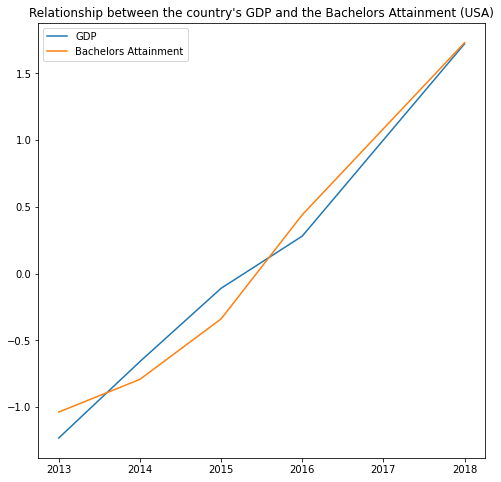

In [45]:
plt.figure(figsize=(8, 8))
usa = df1[(df1['Country Name'] == "United States") & (df1['Year'] > 2012)]
standardizer = StandardScaler()
normalizer = Normalizer()
gdp_standardized = standardizer.fit_transform(usa['GDP'].to_numpy().reshape(-1, 1))
bach_standardized = standardizer.fit_transform(usa['BachelorsAttainment'].to_numpy().reshape(-1, 1))
 
plt.plot(usa["Year"], gdp_standardized, label="GDP")
plt.plot(usa["Year"], bach_standardized, label="Bachelors Attainment")
plt.title("Relationship between the country's GDP and the Bachelors Attainment (USA)")
plt.legend()
plt.show()


### The below code is a pair plot of all the features in our dataset.
The KDE plot shows us the trend along with the distribution of the data against each feature and the Scatter plot shows us the mere trend based on each feature.



*   We can clearly see that there is a positive correlation between all features as time progresses.
*   If we notice closely, we can identify that the `Educational attainments` against the `Year` in the scatter plot shows that the rate of increase in educational attainment has increased post 2015 after a period of slow increase. This is very prominent in the case of `DoctoralAttainment` - where there has been a drop during the `2014-2015` period. This could be interlinked to the effects on education due to the Great Recession.



LinAlgError: ignored

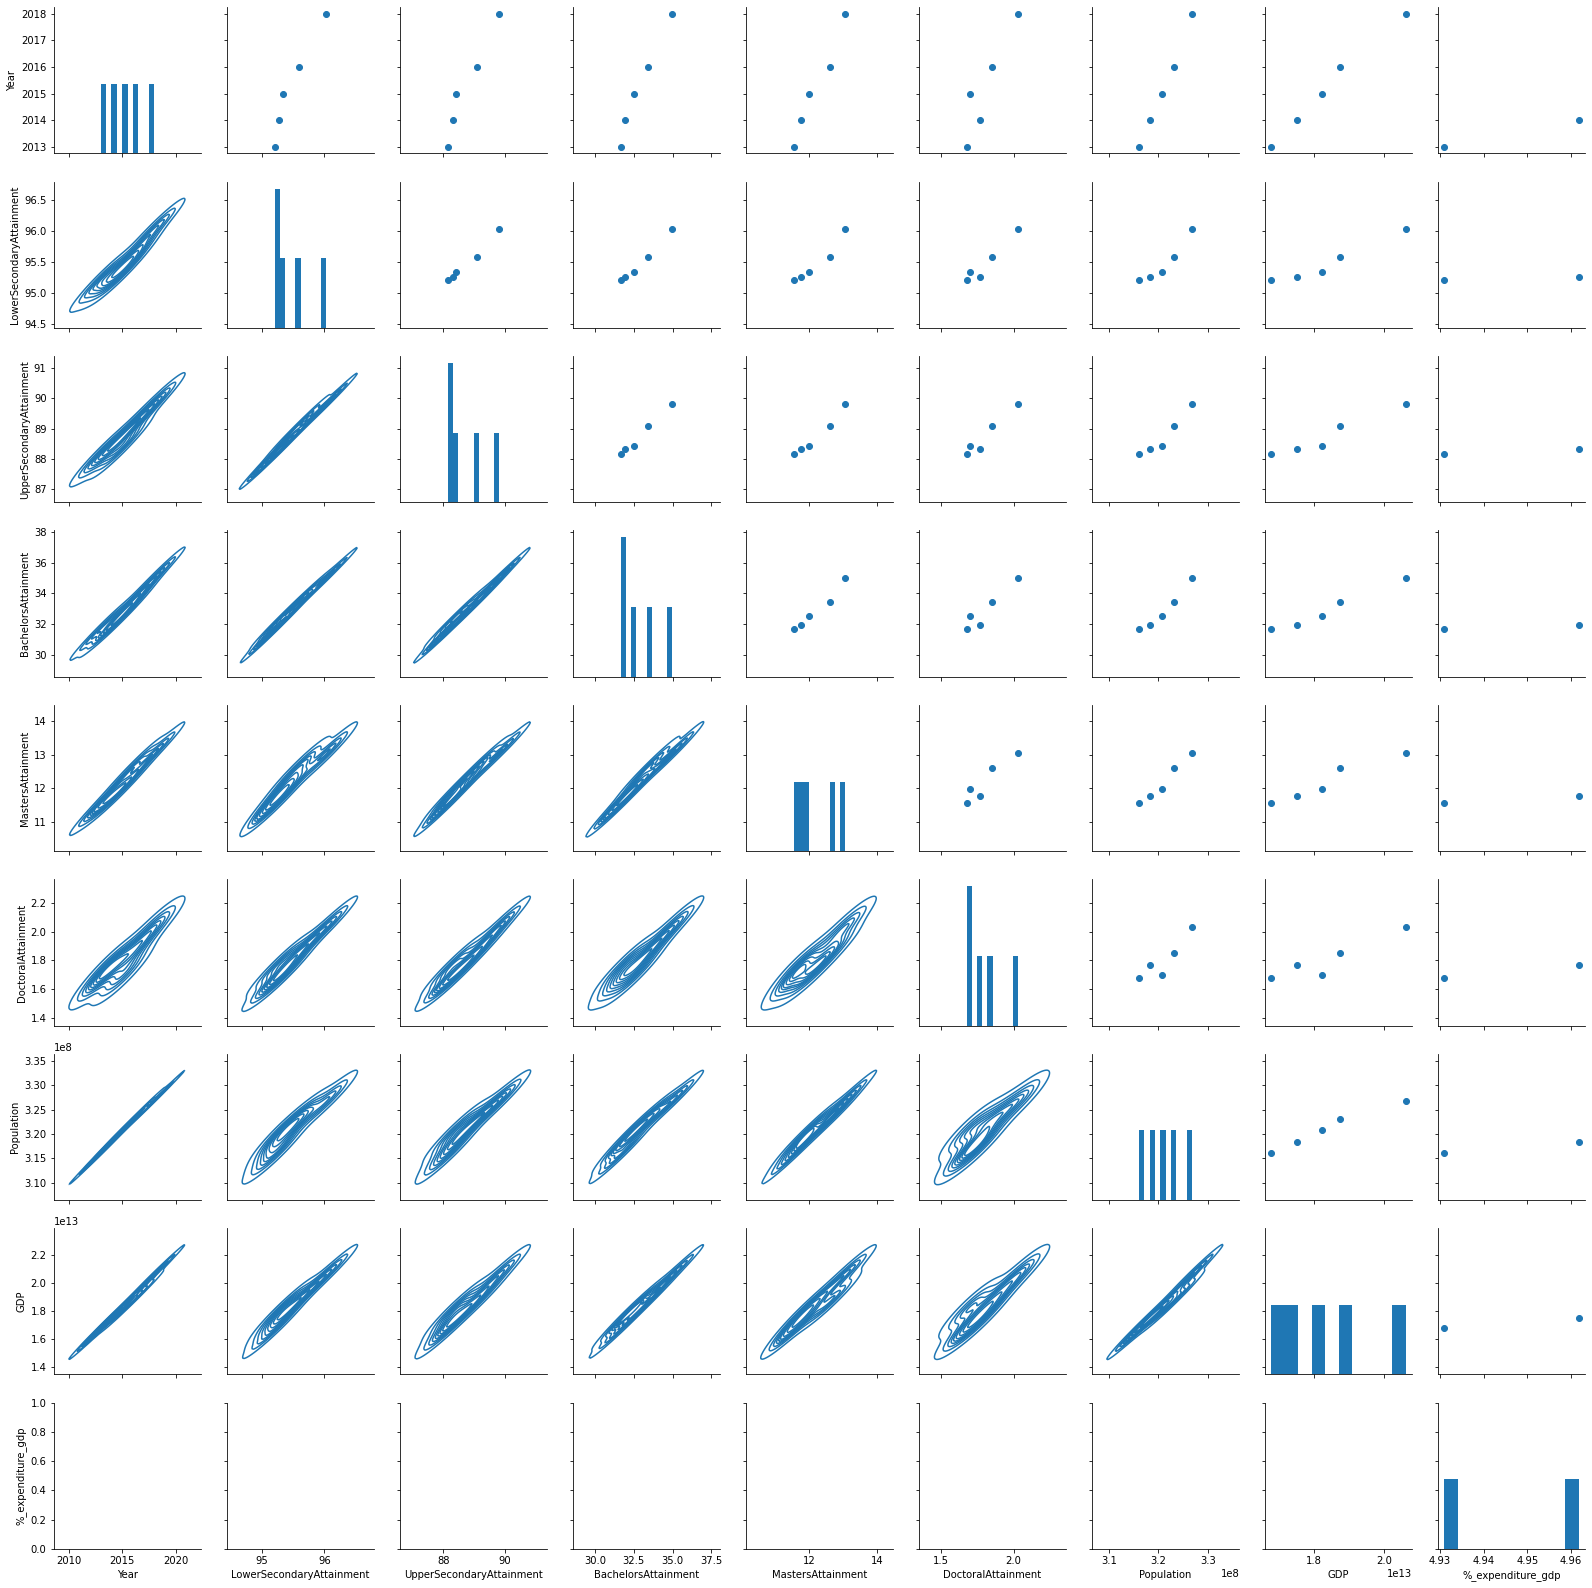

In [ ]:
g = sns.PairGrid(usa)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# **Comparision of GDP's correlation with educational attainments**

Here, we have a visualization that compares the GDP and the Bachelor's Attainment of two countries.


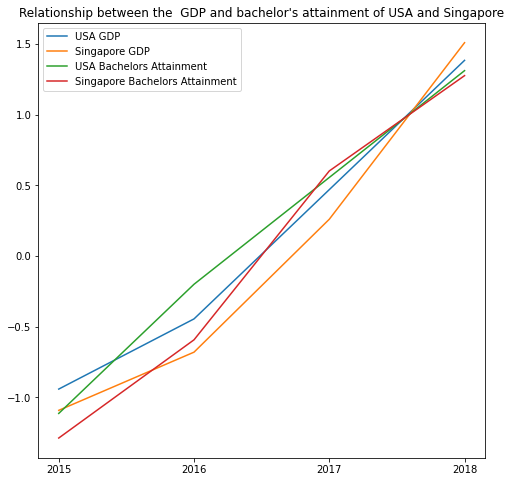

In [ ]:
plt.figure(figsize=(8, 8))
usa = df1[(df1['Country Name'] == "United States") & (df1['Year'] > 2014)]
sing = df1[(df1['Country Name']== "Singapore") & (df1['Year'] > 2014)]
standardizer = StandardScaler()
normalizer = Normalizer()
usgdp_standardized = standardizer.fit_transform(usa['GDP'].to_numpy().reshape(-1, 1))
singgdp_standardized = standardizer.fit_transform(sing['GDP'].to_numpy().reshape(-1,1))
usbach_standardized = standardizer.fit_transform(usa['BachelorsAttainment'].to_numpy().reshape(-1, 1))
singbach_standardized = standardizer.fit_transform(sing['BachelorsAttainment'].to_numpy().reshape(-1, 1))
plt.plot(usa["Year"], usgdp_standardized, label="USA GDP")
plt.plot(sing["Year"], singgdp_standardized, label="Singapore GDP")
plt.plot(usa["Year"], usbach_standardized, label="USA Bachelors Attainment")
plt.plot(sing["Year"], singbach_standardized, label="Singapore Bachelors Attainment")
plt.title("Relationship between the  GDP and bachelor's attainment of USA and Singapore")
plt.xticks(sing['Year'])
plt.legend()
plt.show()

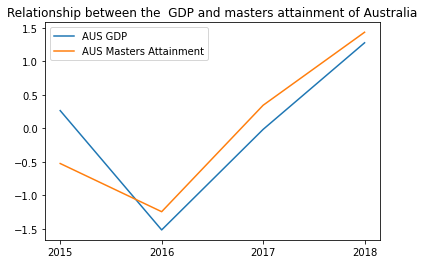

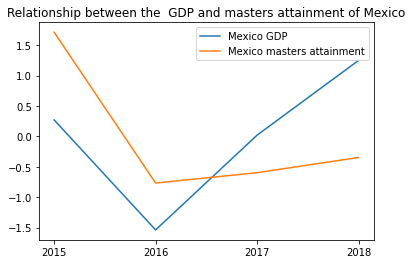

In [ ]:
aus = df1[(df1['Country Name']== "Australia") & (df1['Year'] > 2014)]
mexico = df1[(df1['Country Name']== "Mexico") & (df1['Year'] > 2014)]


ausgdp_standardized = standardizer.fit_transform(aus['GDP'].to_numpy().reshape(-1,1))
aus_mast_standardized = standardizer.fit_transform(aus['MastersAttainment'].to_numpy().reshape(-1, 1))
mexgdp_standardized = standardizer.fit_transform(mexico['GDP'].to_numpy().reshape(-1,1))
mex_mast_standardized = standardizer.fit_transform(mexico['MastersAttainment'].to_numpy().reshape(-1, 1))
plt.plot(aus["Year"], ausgdp_standardized, label="AUS GDP")
plt.plot(aus["Year"], aus_mast_standardized, label="AUS Masters Attainment")

plt.title("Relationship between the  GDP and masters attainment of Australia")
plt.xticks(aus['Year'])
plt.legend()
plt.show()
print()
plt.plot(mexico['Year'], mexgdp_standardized, label="Mexico GDP")
plt.plot(mexico['Year'], mex_mast_standardized, label="Mexico masters attainment")
plt.title("Relationship between the  GDP and masters attainment of Mexico")
plt.xticks(aus['Year'])
plt.legend()
plt.show()





>   In the above visualization, we notice that Australia's GDP has dropped from 2015 to 2016 along with the masters attainment and even so for the case of Mexico, but the rate of growth in attainment wasn't as swift as compared to australia. This could be due to other factors unconsidered factors.








In [ ]:
# Compare the top 10 doctoral attainment with the top 10 gdp countries to see if there is a match
gdp_2018 = df1[df1['Year'] == 2018]
country_list_gdp = list(gdp_2018.sort_values(by="GDP", ascending=False)['Country Name'][:10])
country_list_doc = list(gdp_2018.sort_values(by="DoctoralAttainment", ascending=False)['Country Name'][:10])
country_dict_gdp = dict()
country_dict_bach = dict()
for i in range(len(country_list_gdp)):
  country_dict_gdp[i] = country_list_gdp[i]

print("Countries with highest GDP (Descending) -", country_dict_gdp)
for i in range(len(country_list_bach)):
  country_dict_bach[i] = country_list_doc[i]
print("Countries with highest Doctoral diplomas (Descending) -", country_dict_bach)

print("Intersection -", set(country_list_gdp).intersection(set(country_list_doc)))

Countries with highest GDP (Descending) - {0: 'United States', 1: 'Germany', 2: 'Brazil', 3: 'Australia', 4: 'Spain', 5: 'Mexico', 6: 'Indonesia', 7: 'Netherlands', 8: 'Switzerland', 9: 'Argentina'}
Countries with highest Doctoral diplomas (Descending) - {0: 'Switzerland', 1: 'United States', 2: 'Germany', 3: 'Australia', 4: 'Latvia', 5: 'United Arab Emirates', 6: 'Denmark', 7: 'Cyprus', 8: 'Spain', 9: 'Netherlands'}
Intersection - {'United States', 'Spain', 'Switzerland', 'Germany', 'Netherlands', 'Australia'}




>* 6 out of the top 10 countries with highest Doctoral attainents are from the top 10 GDP countries. This tells us that the higher the diploma the probability that the country has a high attainment rate is proportional to the country's economic standing.*



Text(0.5, 1.0, 'Distributions of Doctoral attainment vs year for top 7 gdp countries.')

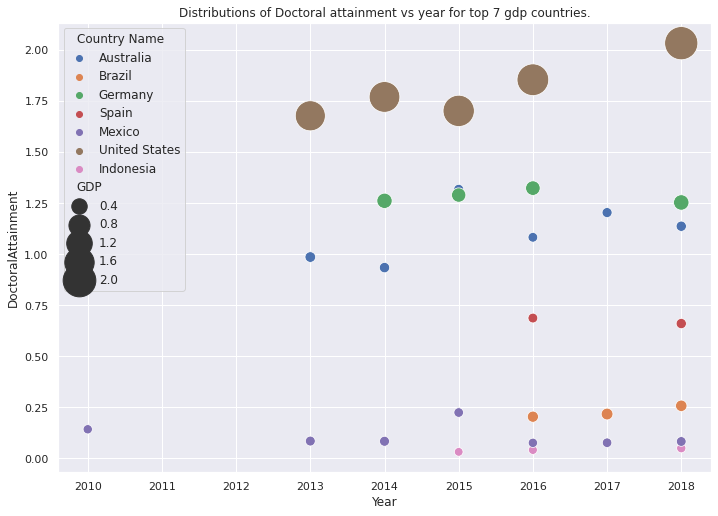

In [ ]:
# Scatter plot to shwo the distributions of attainment vs year for top 7 gdp countries.
country_list_gdp_7 = list(gdp_2018.sort_values(by="GDP", ascending=False)['Country Name'][:7])
top_7_gdp = df1['Country Name'].isin(country_list_gdp_7)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="Year", y="DoctoralAttainment", data = df1[top_7_gdp], hue='Country Name', size="GDP", sizes=(50, 1100)).set_title("Distributions of Doctoral attainment vs year for top 7 gdp countries.")

This scatter plot shows the distributions of Doctoral attainment vs year for top 7 gdp countries. The output is as expected and USA with the highest GDP (denoted by a bigger marker - higher GDP) has the highest doctoral attainment. 